# Data prep

In [16]:
library(lubridate)  #work with dates
library(xts)
library(zoo)
library(forecast)
lct <- Sys.getlocale("LC_TIME"); Sys.setlocale("LC_TIME", "C") #needed for as.POSIXct

[1] "C"

In [4]:
data <- read.csv('bicup2006.csv',sep=',')
head(data)
dim(data)

DATE,TIME,DEMAND
1-Mar-05,6:30,1
1-Mar-05,6:45,2
1-Mar-05,7:00,4
1-Mar-05,7:15,0
1-Mar-05,7:30,10
1-Mar-05,7:45,13


[1] 1512    3

In [5]:
daytype<-rep("weekday",1512)
daytype[253:378]<-"weekend"
daytype[694:819]<-"weekend"
daytype[1135:1260]<-"weekend"
dtype<-rep(1,1512)
dtype[which(daytype=="weekend")]<-3


myseason<-rep(seq(1,63),24)

In [6]:
date.and.time<-paste(data$DATE,data$TIME) #combine date and time in one column
posix.date<-as.POSIXct(date.and.time,format="%d-%b-%y %H:%M")
#create new dataframe with columns posix.date and demand
newdata<-data.frame(posix.date,data$DEMAND,daytype,myseason,dtype)
names(newdata)<-c('date.and.time','demand','daytype','myseason','dtype')
head(newdata)
dim(newdata)

date.and.time,demand,daytype,myseason,dtype
2005-03-01 06:30:00,1,weekday,1,1
2005-03-01 06:45:00,2,weekday,2,1
2005-03-01 07:00:00,4,weekday,3,1
2005-03-01 07:15:00,0,weekday,4,1
2005-03-01 07:30:00,10,weekday,5,1
2005-03-01 07:45:00,13,weekday,6,1


[1] 1512    5

In [7]:
#indexes for first two weeks
training.set<-newdata[1:(14*63),]
#indexes for last week
validation.set<-newdata[((14*63)+1):(21*63),]
#indexes for last 3 days
future.set<-newdata[((21*63)+1):dim(newdata)[1],]

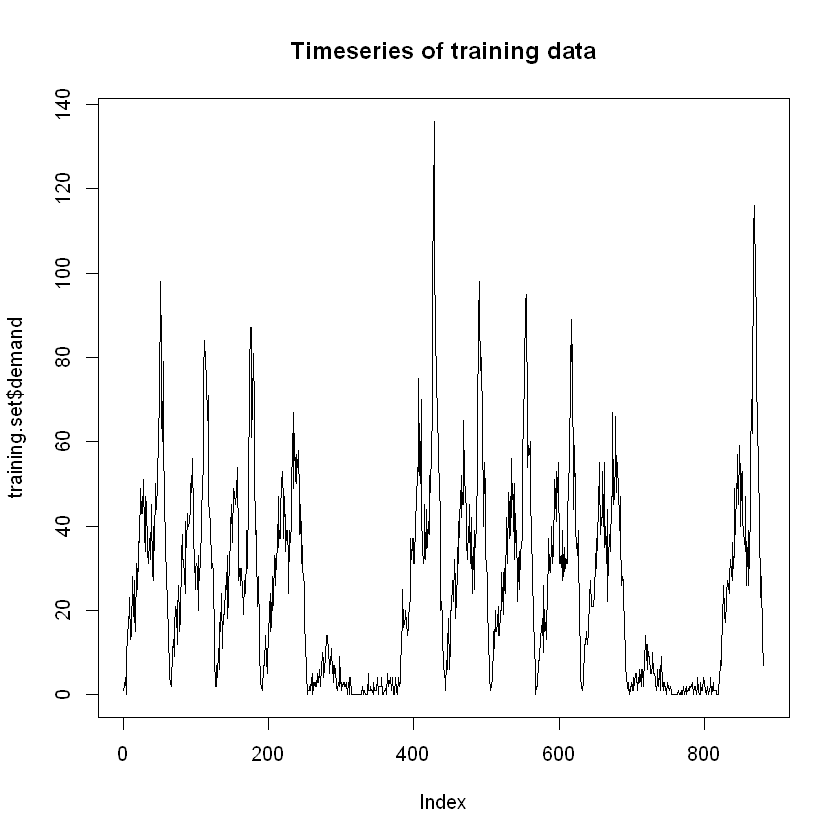

In [8]:
plot(training.set$demand,type='l',main="Timeseries of training data")

In [104]:
newdata.xts = xts(coredata(newdata$demand), order.by=as.POSIXct(newdata$date.and.time))
attr(newdata.xts,"frequency")<-63
periodicity(newdata.xts)
total_timeseries<-as.ts(newdata.xts)

15 minute periodicity from 2005-03-01 06:30:00 to 2005-03-24 22:00:00 

In [10]:
seasonal_data<-data.frame(newdata,seasonaldummy(total_timeseries))

In [11]:
my.xts = xts(coredata(training.set$demand), order.by=as.POSIXct(training.set$date.and.time))
attr(my.xts,"frequency")<-63
periodicity(my.xts)
timeseries<-as.ts(my.xts)

15 minute periodicity from 2005-03-01 06:30:00 to 2005-03-14 22:00:00 

In [12]:
day_column<-rep(1,1512)
for(i in seq(1:1512)){
    
        day<-strtoi(substr(newdata$date.and.time[i],9,10),base = 10)
        if(day==7 | day==14 | day==21){
            day_column[i]<-1
        }else if(day==1 | day==8 | day==15 | day==22){
            day_column[i]<-2
        }else if(day==2 | day==9 | day==16 | day==23){
            day_column[i]<-3
        }else if(day==3 | day==10 | day==17 | day==24){
            day_column[i]<-4
        }else if(day==4 | day==11 | day==18 | day==25){
            day_column[i]<-5
        }else if(day==5 | day==12 | day==19 | day==26){
            day_column[i]<-6
        }else if(day==6 | day==13 | day==20){
            day_column[i]<-7
        }
}
            
seasonal_and_day_data<-data.frame(day_column,seasonal_data)

In [13]:
model<-tslm(timeseries ~ dtype[1:882]*day_column[1:882] *(
            
 + seasonal_data[1:882, 5+1 ]
  + seasonal_data[1:882, 5+2 ]
  + seasonal_data[1:882, 5+3 ]+ seasonal_data[1:882, 5+4 ]
 + seasonal_data[1:882, 5+5 ]+ seasonal_data[1:882, 5+6 ]+ seasonal_data[1:882, 5+7 ]+ seasonal_data[1:882, 5+8 ]
 + seasonal_data[1:882,  5+9]+ seasonal_data[1:882, 5+10 ]+ seasonal_data[1:882, 5+11 ]+ seasonal_data[1:882, 5+12 ]
 + seasonal_data[1:882, 5+13 ]+ seasonal_data[1:882, 5+14 ]+ seasonal_data[1:882, 5+15 ]+ seasonal_data[1:882, 5+16 ]
 + seasonal_data[1:882, 5+17 ]+ seasonal_data[1:882, 5+18 ]+ seasonal_data[1:882, 5+19 ]+ seasonal_data[1:882, 5+20 ]
 + seasonal_data[1:882, 5+21 ]+ seasonal_data[1:882, 5+22 ]+ seasonal_data[1:882, 5+23 ]+ seasonal_data[1:882, 5+24 ]
 + seasonal_data[1:882, 5+25 ]+ seasonal_data[1:882, 5+26 ]+ seasonal_data[1:882, 5+27 ]+ seasonal_data[1:882, 5+28 ]
+ seasonal_data[1:882, 5+29 ]
+ seasonal_data[1:882, 5+30 ]+ seasonal_data[1:882, 5+31 ]+ seasonal_data[1:882, 5+32]
+ seasonal_data[1:882, 5+33 ]
+ seasonal_data[1:882, 5+34 ]+ seasonal_data[1:882, 5+35 ]+ seasonal_data[1:882, 5+36 ]
+ seasonal_data[1:882, 5+37 ]
+ seasonal_data[1:882, 5+38 ]
+ seasonal_data[1:882, 5+39 ]+ seasonal_data[1:882, 5+40 ]
+ seasonal_data[1:882, 5+41 ]+ seasonal_data[1:882, 5+42 ]
+ seasonal_data[1:882, 5+43 ]+ seasonal_data[1:882, 5+44 ]
+ seasonal_data[1:882, 5+45 ]+ seasonal_data[1:882, 5+46 ]
+ seasonal_data[1:882, 5+47 ]+ seasonal_data[1:882, 5+48 ]
+ seasonal_data[1:882, 5+49 ]+ seasonal_data[1:882, 5+50 ]
+ seasonal_data[1:882, 5+51 ]+ seasonal_data[1:882, 5+52 ]
+ seasonal_data[1:882, 5+53 ]+ seasonal_data[1:882, 5+54 ]
+ seasonal_data[1:882, 5+55 ]
+ seasonal_data[1:882, 5+56 ]
+ seasonal_data[1:882, 5+57 ]
+ seasonal_data[1:882, 5+58 ]
+ seasonal_data[1:882, 5+59 ]
+ seasonal_data[1:882, 5+60 ]
+ seasonal_data[1:882, 5+61 ]
+ seasonal_data[1:882, 5+62 ]

                )
            
           )

summary(model)


Call:
tslm(formula = timeseries ~ dtype[1:882] * day_column[1:882] * 
    (+seasonal_data[1:882, 5 + 1] + seasonal_data[1:882, 5 + 
        2] + seasonal_data[1:882, 5 + 3] + seasonal_data[1:882, 
        5 + 4] + seasonal_data[1:882, 5 + 5] + seasonal_data[1:882, 
        5 + 6] + seasonal_data[1:882, 5 + 7] + seasonal_data[1:882, 
        5 + 8] + seasonal_data[1:882, 5 + 9] + seasonal_data[1:882, 
        5 + 10] + seasonal_data[1:882, 5 + 11] + seasonal_data[1:882, 
        5 + 12] + seasonal_data[1:882, 5 + 13] + seasonal_data[1:882, 
        5 + 14] + seasonal_data[1:882, 5 + 15] + seasonal_data[1:882, 
        5 + 16] + seasonal_data[1:882, 5 + 17] + seasonal_data[1:882, 
        5 + 18] + seasonal_data[1:882, 5 + 19] + seasonal_data[1:882, 
        5 + 20] + seasonal_data[1:882, 5 + 21] + seasonal_data[1:882, 
        5 + 22] + seasonal_data[1:882, 5 + 23] + seasonal_data[1:882, 
        5 + 24] + seasonal_data[1:882, 5 + 25] + seasonal_data[1:882, 
        5 + 26] + seasonal_

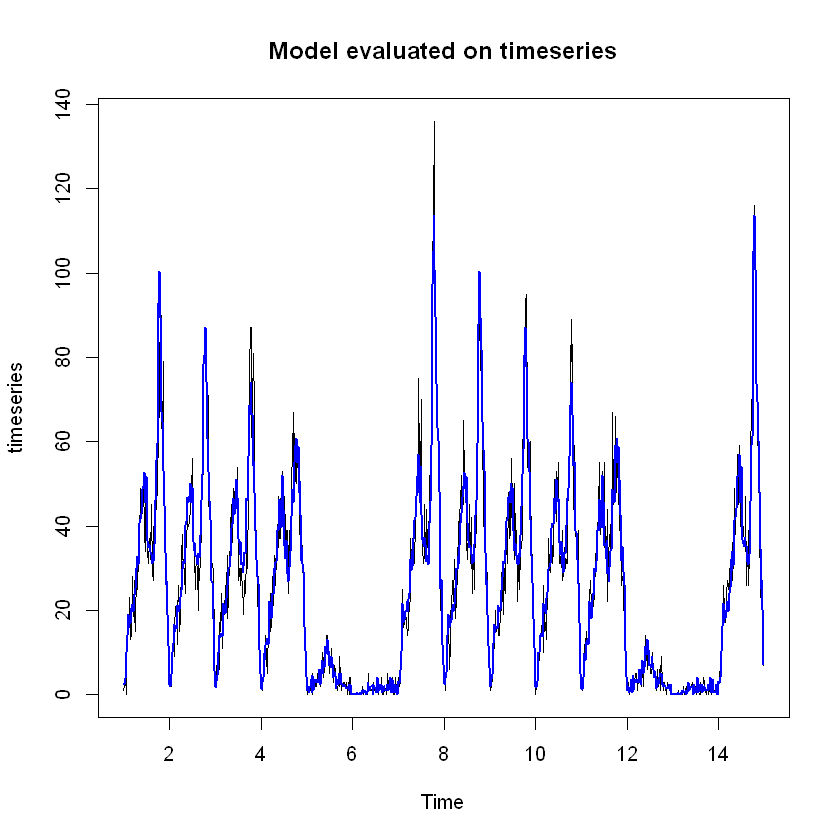

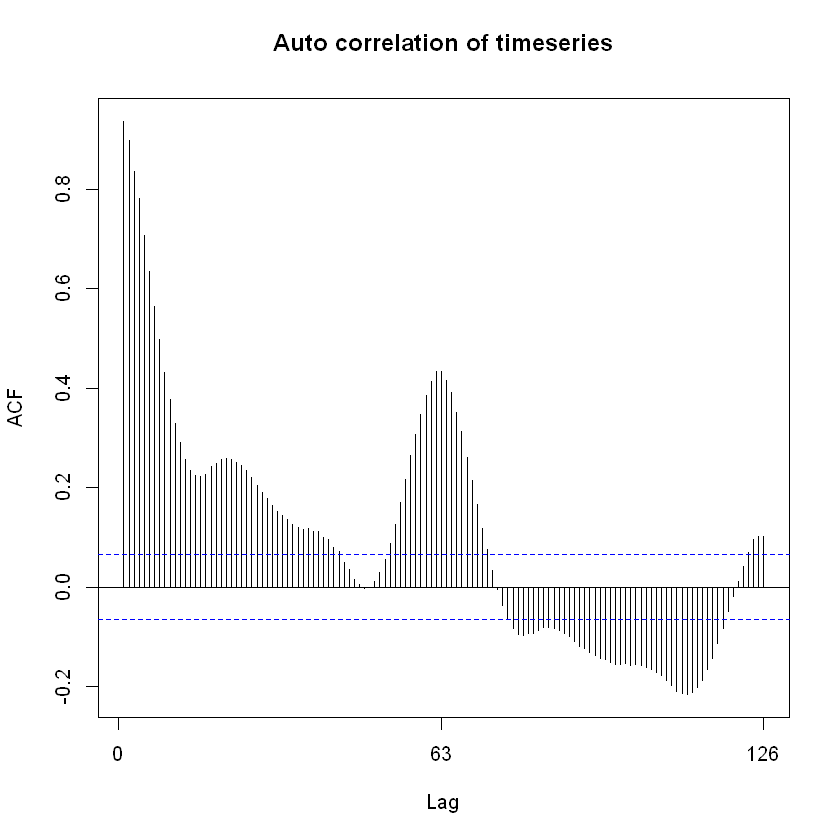

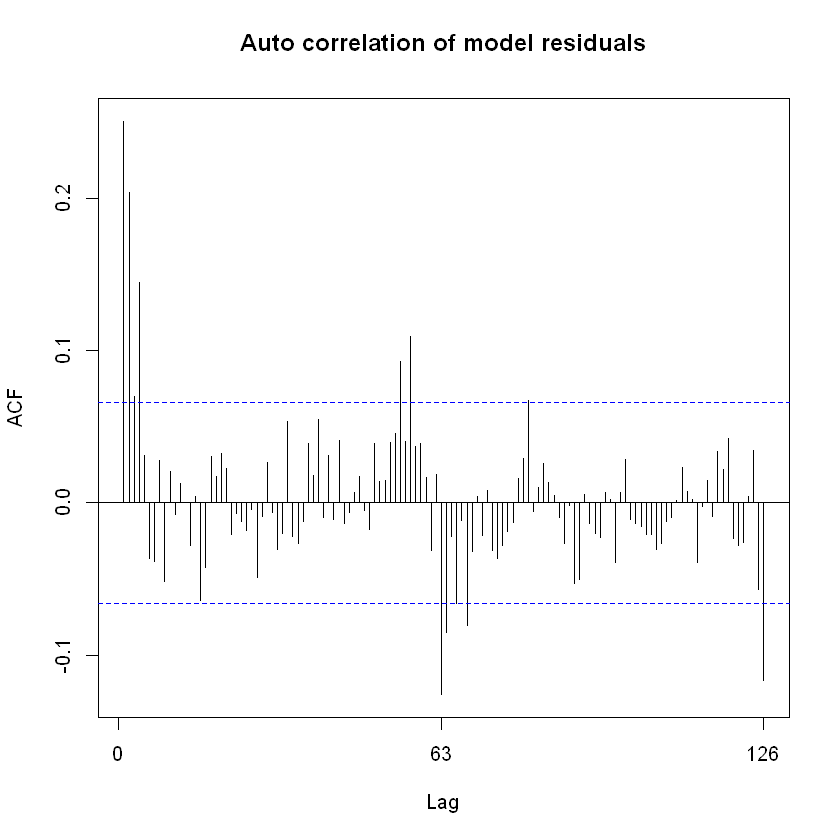

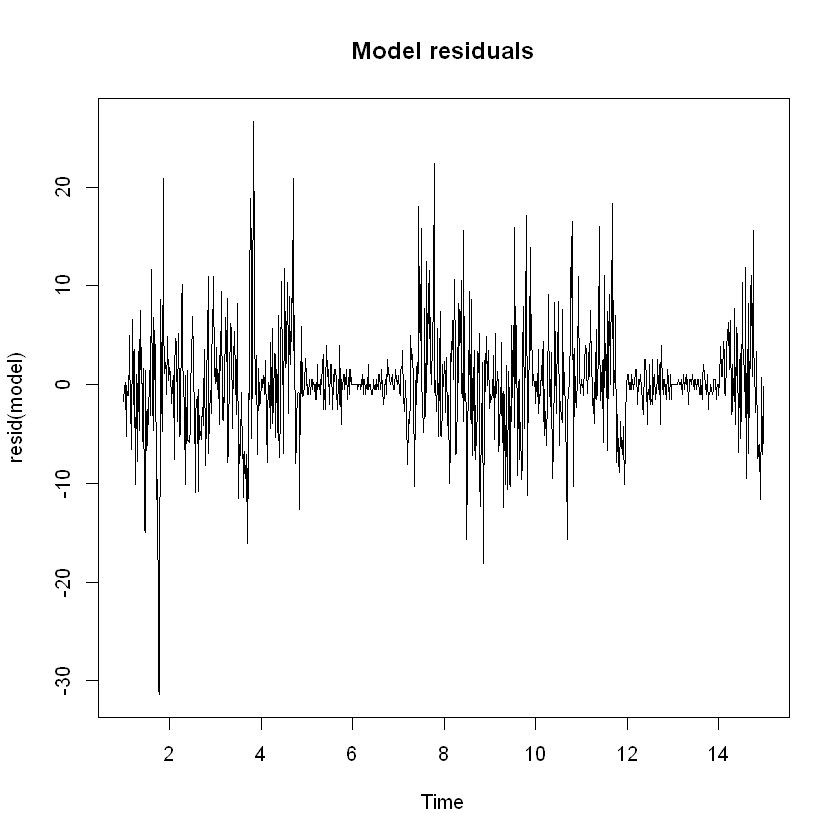

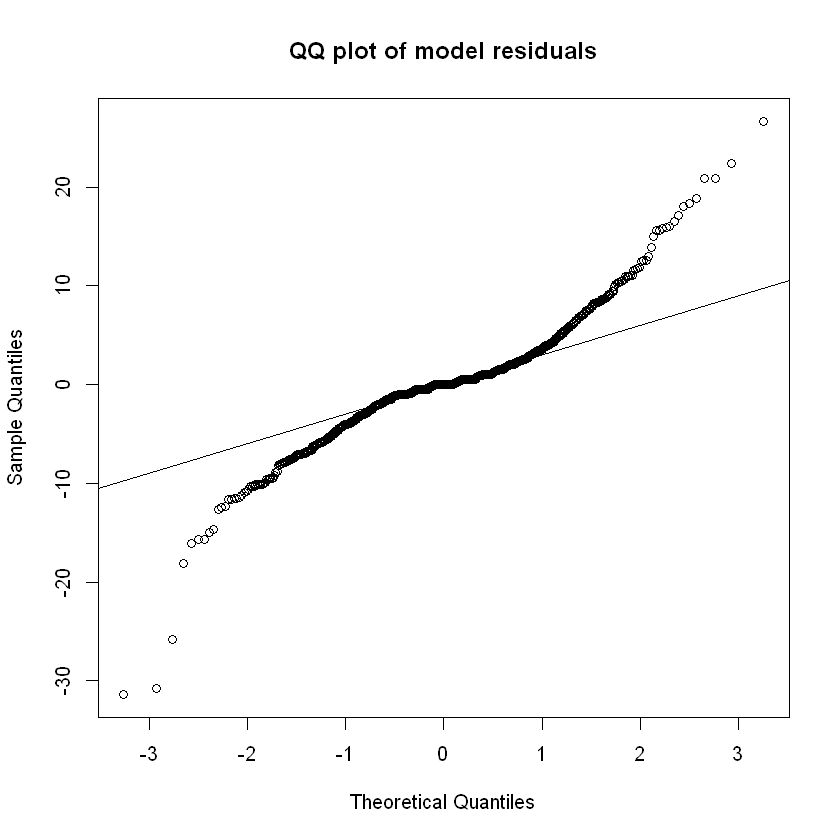

In [14]:
#coefficients(model)
coef<-coefficients(model)
plot(timeseries,main='Model evaluated on timeseries')
lines(model$fitted, lwd = 2,col='blue')

#model testing
Acf(timeseries,main='Auto correlation of timeseries')
Acf(resid(model),main='Auto correlation of model residuals')
plot(resid(model),main='Model residuals')
qqnorm(resid(model),main='QQ plot of model residuals')
qqline(resid(model))

# Smoothing methods

In [33]:
# centered moving average with window order = 
ma.centered <- ma(timeseries, order = 63)

# trailing moving average with window k = 
# in rollmean(), use argument align = right to calculate a trailing moving average.
ma.trailing <- rollmean(timeseries, k = 63, align = "right")




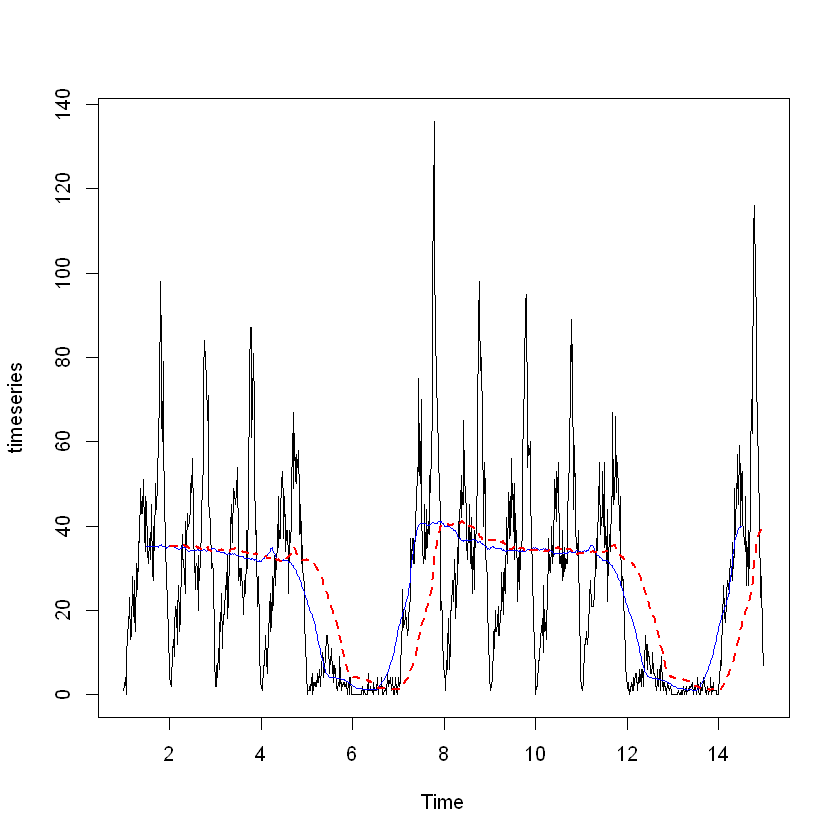

In [34]:
plot(timeseries)
lines(ma.centered,col='blue')
lines(ma.trailing, lwd = 2, lty = 2,col='red')

In [35]:
# obtain the last moving average in the training period
last.ma <- tail(ma.trailing, 1)

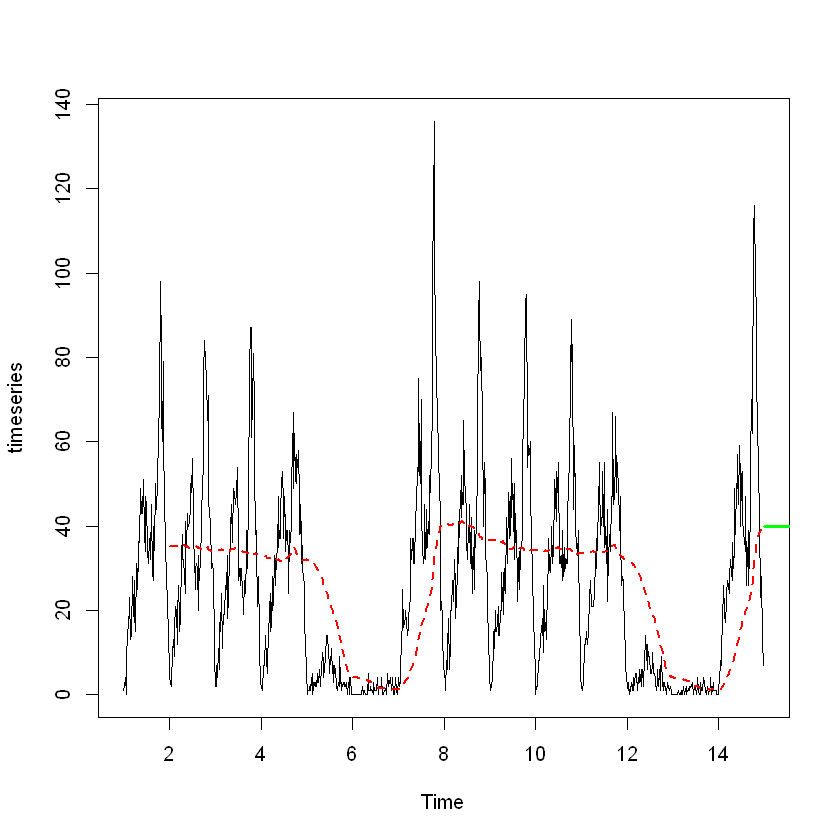

In [44]:
# create forecast based on last MA
ma.trailing.pred <- ts(rep(last.ma, 120),freq=63,start = c(14,63 +1))
plot(timeseries)
lines(ma.trailing, lwd = 2, lty = 2,col='red')
lines(ma.trailing.pred,col='green',lwd=3)

# Moving average to residuals

**Choosing window width (w)**
With moving average forecasting or visualization, the only choice that the user
must make is the width of the window (w). As with other methods such as knearest neighbors, the choice of the smoothing parameter is a balance between
under-smoothing and over-smoothing. For visualization (using a centered window), wider windows will expose more global trends, while narrow windows
will reveal local trends. Hence, examining several window widths is useful for
exploring trends of differing local/global nature. For forecasting (using a trailing window), the choice should incorporate domain knowledge in terms of
relevance of past values and how fast the series changes. Empirical predictive
evaluation can also be done by experimenting with different values of w and
comparing performance. However, care should be taken not to overfit!

Last trailing moving average value -5.25

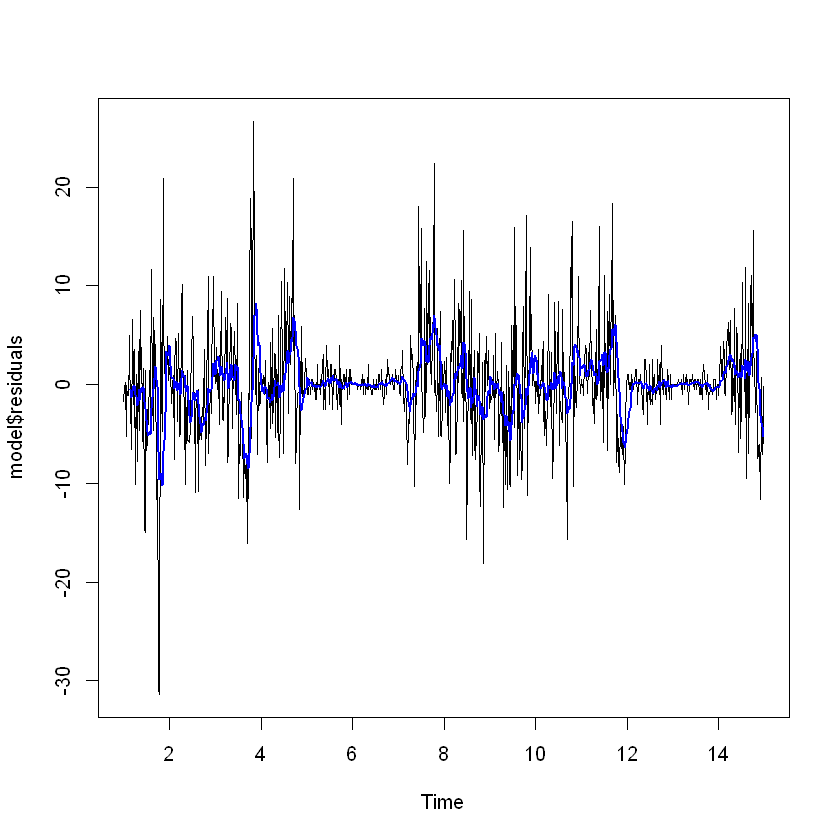

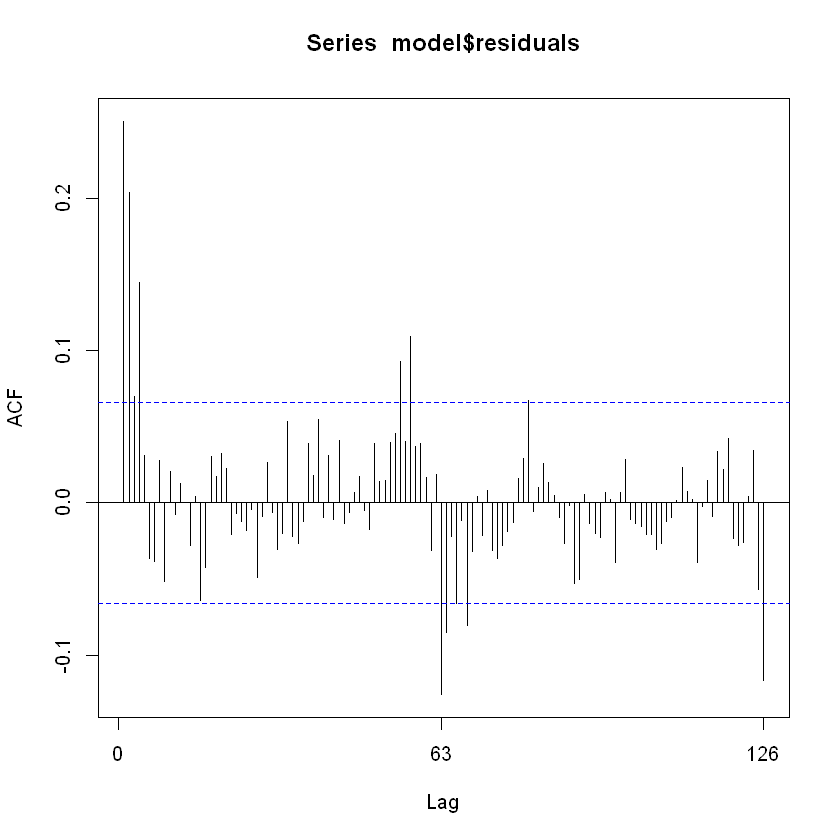

In [59]:
# create single-point forecast
#cant do it yet i have to define the model

# apply MA to residuals    k =window
ma.trailing <- rollmean(model$residuals, k = 10, align = "right")
last.ma <- tail(ma.trailing, 1)
cat('Last trailing moving average value',last.ma)

plot(model$residuals)
lines(ma.trailing,col='blue',lwd=2)

Acf(model$residuals)

Maybe since our residuals have high autocorrelation at lag 1 , we can use this to improve the next prediction by using the trailing moving average of the errors to subtract the last value of the t.m.a. from the models prediction.In a sense,since we kind of know what the next error is going to be from the previous error,we use this information to improve the next forecast.

# Simple exponential smoothing

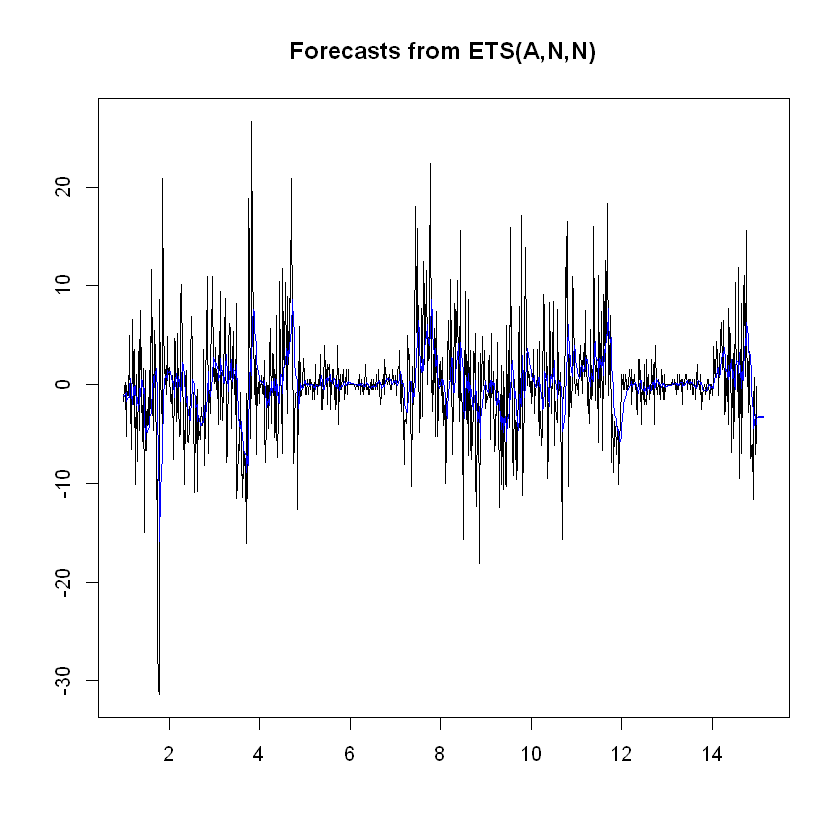

In [68]:
# get residuals
residuals.ts <- model$residuals
# run simple exponential smoothing
# use ets() with model = "ANN" (additive error (A), no trend (N), no seasonality (N))
# and alpha = 0.2 to fit simple exponential smoothing.
ses <- ets(residuals.ts, model = "ANN", alpha = 0.2)
ses.pred <- forecast(ses, h = 10, level = 0)

plot(ses.pred)
lines(ses.pred$fitted,col='blue')

# Holt-Winters

In [92]:
my.xts = xts(coredata(training.set$demand), order.by=as.POSIXct(training.set$date.and.time))
attr(my.xts,"frequency")<-63
periodicity(my.xts)
timeseries<-as.ts(my.xts)

15 minute periodicity from 2005-03-01 06:30:00 to 2005-03-14 22:00:00 

In [80]:
# run Holt-Winters exponential smoothing
# use ets() with option model = "MAA" to fit Holt-Winter's exponential smoothing
# with multiplicative error, additive trend, and additive seasonality.
hwin <- ets(timeseries, model = "ZAZ")
# create predictions
hwin.pred <- forecast(hwin, h = 100, level = 0)

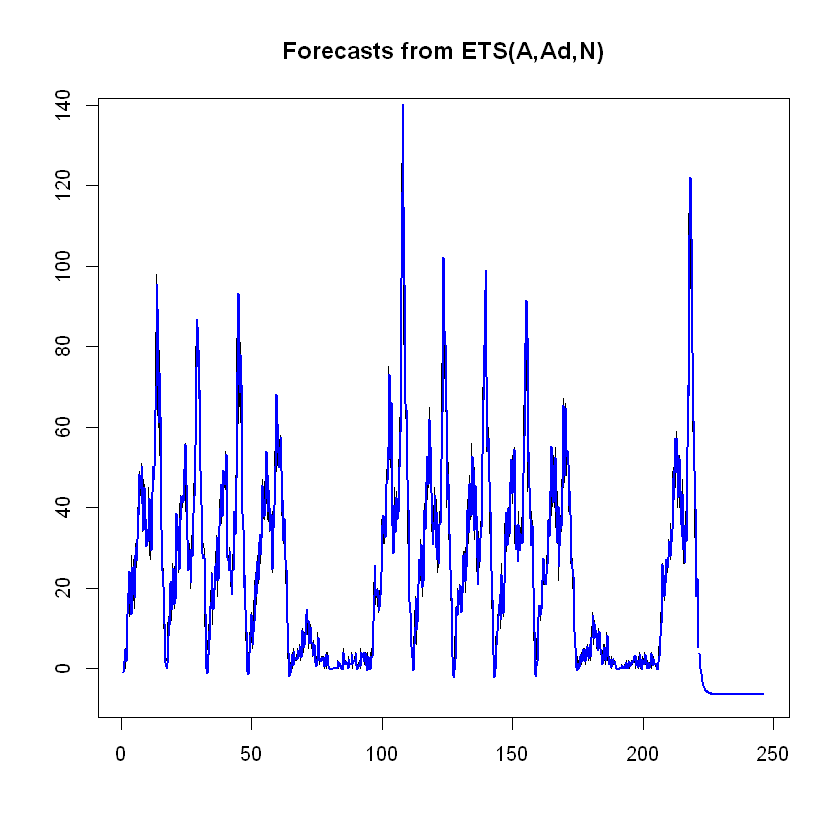

In [81]:
plot(hwin.pred)
lines(hwin.pred$fitted, lwd = 2, col = "blue")

# Links-References

holt winters may be bad for my data
- https://stats.stackexchange.com/questions/76322/forecasting-using-holt-winters-technique-using-r-with-less-than-2-years-of-histo 


More on TBATS
- https://robjhyndman.com/hyndsight/tbats-with-regressors/  

- https://robjhyndman.com/hyndsight/seasonal-periods/